In [117]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon

### Confidence Interval on correlation coefficient

In [390]:
N = 1000
confidence = 95
x = np.random.randn(N)
y = np.random.randn(N)
r = 0.7358
y = x*r + y*np.sqrt(1-r**2)
corr_s = stats.spearmanr(x,y)[0]

boots_corr = np.zeros(N)

for i in range(N):
    random_idx = np.random.choice(np.arange(0,N),N)
    boots_corr[i] = stats.spearmanr(x[random_idx],y[random_idx])[0]

confint = [0,0]
confint[0] = np.percentile(boots_corr,(100-confidence)/2)
confint[1] = np.percentile(boots_corr,100-(100-confidence)/2)

0.7052679212679214


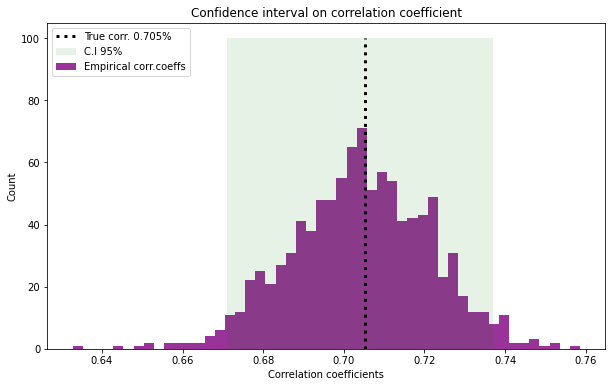

In [391]:
fig,ax = plt.subplots(1,1,figsize=(10,6))
h = 100

print(corr_s)

ax.hist(boots_corr,50,color='purple',alpha=.8)
y_CI = np.array([[confint[0],h],[confint[1],h],[confint[1],0],[confint[0],0]])
p = Polygon(y_CI,facecolor='green',alpha=.1)
ax.add_patch(p)
ax.plot([corr_s,corr_s],[0,h],'k:',linewidth=3)
ax.set_xlabel('Correlation coefficients')
ax.set_ylabel('Count')
ax.set_title('Confidence interval on correlation coefficient')
plt.legend(('True corr. %g%%'%np.round(corr_s,3), 'C.I %g%%'%confidence,'Empirical corr.coeffs'))

plt.show()

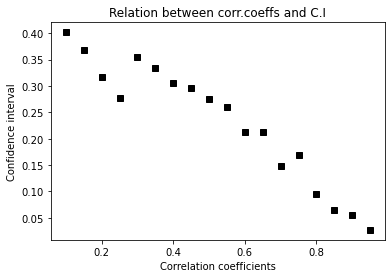

In [427]:
N = 100
confidence = 95
rs = np.arange(.1,1,.05)
diffcorr = np.zeros(len(rs))

for i,r in enumerate(rs):
    x = np.random.rand(N)
    y = np.random.rand(N)
    boots_corr = np.zeros(N)
    y = x*r + y*np.sqrt(1-r**2)
    corr = stats.pearsonr(x,y)[0]
    
    for n in range(N):
        random_idx = np.random.choice(np.arange(0,N),N)
        boots_corr[n] = stats.pearsonr(x[random_idx],y[random_idx])[0]

    confint = [0,0]
    confint[0] = np.percentile(boots_corr,(100-confidence)/2)
    confint[1] = np.percentile(boots_corr,100-(100-confidence)/2)
    diffcorr[i] = confint[1] - confint[0]

plt.plot(rs,diffcorr,'ks')
plt.xlabel('Correlation coefficients')
plt.ylabel('Confidence interval')
plt.title('Relation between corr.coeffs and C.I')
plt.show()